In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Download data for Apple, Nvidia, Google, Microsoft, Meta and Tesla. You can choose other stocks and insert them here
tickers = 'AAPL', 'NVDA', 'GOOGL', 'MSFT', 'META', 'TSLA'
data = yf.download(tickers, start='2018-01-01', end='2023-01-01', progress=False)

# Display the first few rows
data.head()

Price                      Adj Close                                    \
Ticker                          AAPL      GOOGL        META       MSFT   
Date                                                                     
2018-01-02 00:00:00+00:00  40.568924  53.527954  181.047943  79.792900   
2018-01-03 00:00:00+00:00  40.561863  54.441196  184.291290  80.164268   
2018-01-04 00:00:00+00:00  40.750275  54.652668  183.951996  80.869812   
2018-01-05 00:00:00+00:00  41.214233  55.377377  186.466827  81.872459   
2018-01-08 00:00:00+00:00  41.061138  55.572891  187.893890  81.956024   

Price                                               Close             \
Ticker                         NVDA       TSLA       AAPL      GOOGL   
Date                                                                   
2018-01-02 00:00:00+00:00  4.930220  21.368668  43.064999  53.660500   
2018-01-03 00:00:00+00:00  5.254697  21.150000  43.057499  54.576000   
2018-01-04 00:00:00+00:00  5.282397  20.974667  43.257500  54.787998   
2018-01-05 00:00:00+00:00  5.327161  21.105333  43.750000  55.514500   
2018-01-08 00:00:00+00:00  5.490387  22.427334  43.587502  55.710499   

Price                                             ...        Open             \
Ticker                           META       MSFT  ...        META       MSFT   
Date                                              ...                          
2018-01-02 00:00:00+00:00  181.419998  85.949997  ...  177.679993  86.129997   
2018-01-03 00:00:00+00:00  184.669998  86.349998  ...  181.880005  86.059998   
2018-01-04 00:00:00+00:00  184.330002  87.110001  ...  184.899994  86.589996   
2018-01-05 00:00:00+00:00  186.850006  88.190002  ...  185.589996  87.660004   
2018-01-08 00:00:00+00:00  188.279999  88.279999  ...  187.199997  88.199997   

Price                                             Volume                      \
Ticker                        NVDA       TSLA       AAPL     GOOGL      META   
Date                                                                           
2018-01-02 00:00:00+00:00  4.89450  20.799999  102223600  31766000  18151900   
2018-01-03 00:00:00+00:00  5.10250  21.400000  118071600  31318000  16886600   
2018-01-04 00:00:00+00:00  5.39400  20.858000   89738400  26052000  13880900   
2018-01-05 00:00:00+00:00  5.35475  21.108000   94640000  30250000  13574500   
2018-01-08 00:00:00+00:00  5.51000  21.066668   82271200  24644000  17994700   

Price                                                      
Ticker                         MSFT       NVDA       TSLA  
Date                                                       
2018-01-02 00:00:00+00:00  22483800  355616000   65283000  
2018-01-03 00:00:00+00:00  26061400  914704000   67822500  
2018-01-04 00:00:00+00:00  21912000  583268000  149194500  
2018-01-05 00:00:00+00:00  23407100  580124000   68868000  
2018-01-08 00:00:00+00:00  22113000  881216000  147891000  

[5 rows x 36 columns]

In [7]:
# Check for missing values
print(data.isnull().sum())

Price      Ticker
Adj Close  AAPL      0
           GOOGL     0
           META      0
           MSFT      0
           NVDA      0
           TSLA      0
Close      AAPL      0
           GOOGL     0
           META      0
           MSFT      0
           NVDA      0
           TSLA      0
High       AAPL      0
           GOOGL     0
           META      0
           MSFT      0
           NVDA      0
           TSLA      0
Low        AAPL      0
           GOOGL     0
           META      0
           MSFT      0
           NVDA      0
           TSLA      0
Open       AAPL      0
           GOOGL     0
           META      0
           MSFT      0
           NVDA      0
           TSLA      0
Volume     AAPL      0
           GOOGL     0
           META      0
           MSFT      0
           NVDA      0
           TSLA      0
dtype: int64


In [8]:
### If you chose other stocks that have missing values, you can fill them or drop them depending on your preference.
data.fillna(method='ffill', inplace=True)
### however, if you are using my example of Apple, Nvidia, Google, Meta, Tesla and Microsoft, there are no missing values

To Calculate the Daily Returns

In [9]:
daily_returns = data['Adj Close'].pct_change()

In [10]:
daily_returns.head()

Ticker,AAPL,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,
2018-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00+00:00,-0.000174,0.017061,0.017914,0.004654,0.065814,-0.010233
2018-01-04 00:00:00+00:00,0.004645,0.003884,-0.001841,0.008801,0.005271,-0.008290
2018-01-05 00:00:00+00:00,0.011385,0.013260,0.013671,0.012398,0.008474,0.006230
2018-01-08 00:00:00+00:00,-0.003715,0.003531,0.007653,0.001021,0.030640,0.062638


If we want, we can create a dictionary to put the Daily Returns, as well as Moving Averages, Volatility. We can even increase the time period by downloading data until 2024. We can also adjust here the different stocks.

Let's also create a loop that can allow us to preprocess the data.

In [11]:
# Define the tickers, change here any different stocks you may want to use
tickers = ['AAPL', 'NVDA', 'GOOGL', 'MSFT', 'META', 'TSLA']

# Download data for all tickers
data = yf.download(tickers, start='2018-01-01', end='2024-01-01', progress=False, group_by='ticker')

# Create a dictionary to hold preprocessed data for each ticker.
processed_data = {}

# Loop through each ticker/stock and preprocess the data for that particular stock
for ticker in tickers:
    # Access the specific ticker's data
    df = data[ticker].copy()
    
    # Calculate Daily Return
    df['Daily Return'] = df['Adj Close'].pct_change()
    
    # Calculate Moving Averages
    df['50 Day MA'] = df['Adj Close'].rolling(window=50).mean()
    df['200 Day MA'] = df['Adj Close'].rolling(window=200).mean()
    
    # Calculate Volatility (30-day rolling window standard deviation)
    df['Volatility'] = df['Daily Return'].rolling(window=30).std() * np.sqrt(30)
    
    # Drop rows with missing data
    df = df.dropna()
    
    # Store the preprocessed data in the dictionary
    processed_data[ticker] = df

# Display the first few rows of preprocessed data for each ticker to make sure we got all the data
for ticker, df in processed_data.items():
    print(f"\n{ticker} Preprocessed Data:")
    print(df.head())


AAPL Preprocessed Data:
Price                           Open       High        Low      Close  \
Date                                                                    
2018-10-16 00:00:00+00:00  54.732498  55.747501  54.189999  55.537498   
2018-10-17 00:00:00+00:00  55.575001  55.660000  54.834999  55.297501   
2018-10-18 00:00:00+00:00  54.465000  54.935001  53.250000  54.005001   
2018-10-19 00:00:00+00:00  54.514999  55.314999  54.357498  54.827499   
2018-10-22 00:00:00+00:00  54.947498  55.840000  54.735001  55.162498   

Price                      Adj Close     Volume  Daily Return  50 Day MA  \
Date                                                                       
2018-10-16 00:00:00+00:00  52.919342  116736000      0.022037  52.322337   
2018-10-17 00:00:00+00:00  52.690659   91541600     -0.004321  52.392866   
2018-10-18 00:00:00+00:00  51.459087  130325200     -0.023374  52.438100   
2018-10-19 00:00:00+00:00  52.242805  132314800      0.015230  52.491269   
2018-10

Let's visuallize the data. We can take a look at a few of the different stocks 

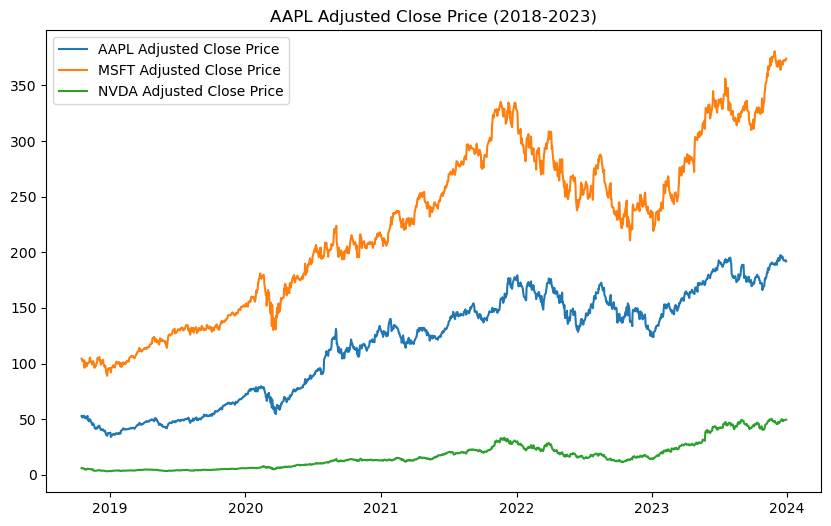

In [12]:
# Visualization  AAPL
plt.figure(figsize=(10,6))
plt.plot(processed_data['AAPL']['Adj Close'], label='AAPL Adjusted Close Price')
plt.plot(processed_data['MSFT']['Adj Close'], label='MSFT Adjusted Close Price')
plt.plot(processed_data['NVDA']['Adj Close'], label='NVDA Adjusted Close Price')
plt.title('AAPL Adjusted Close Price (2018-2023)')
plt.legend()
plt.show()

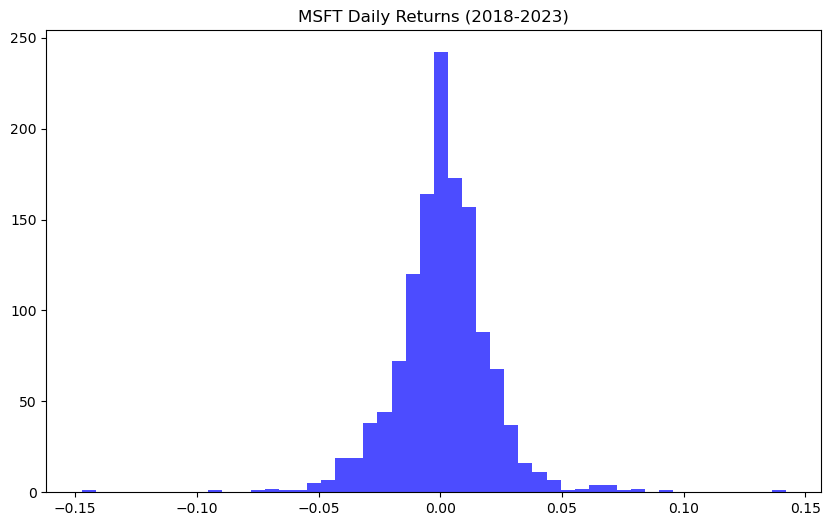

In [13]:
# Visualization of daily returns histogram for MSFT
plt.figure(figsize=(10,6))
plt.hist(processed_data['MSFT']['Daily Return'].dropna(), bins=50, alpha=0.7, color='blue')
plt.title('MSFT Daily Returns (2018-2023)')
plt.show()

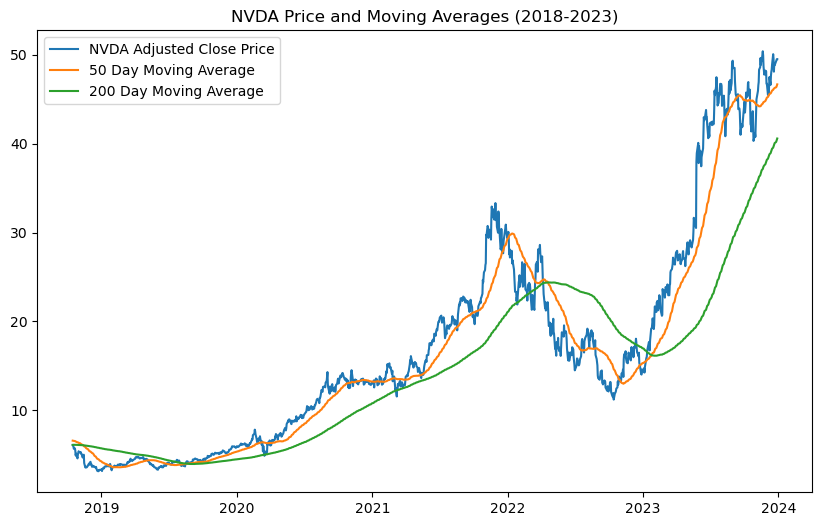

In [14]:
plt.figure(figsize=(10,6))
plt.plot(processed_data['NVDA']['Adj Close'], label='NVDA Adjusted Close Price')
plt.plot(processed_data['NVDA']['50 Day MA'], label='50 Day Moving Average')
plt.plot(processed_data['NVDA']['200 Day MA'], label='200 Day Moving Average')
plt.title('NVDA Price and Moving Averages (2018-2023)')
plt.legend()
plt.show()